Decir que el mosquito vuelve a estar sano es poco probable y no tiene mucho sentido en este modelo porque el tiempo de vida es muy similar al tiempo de la información.

$\gamma$

# Modelos Epidemiológicos - Malaria
## Modelo físico diagramático
- Humanos
	- $N_h$: Cantidad total de humanos tenidos en cuenta
		- $s(t)=1-i(t)$: Proporción de humanos sanos o susceptibles
		- $i(t)=\frac{I(t)}{N_h}$: Proporcion de humanos infectados
			- $I(t)$: Cantidad de humanos infectados
- Mosquitos
	- $N_m$: Cantidad total de mosquitos tenidos en cuenta
		- $v(t)$: Cantidad total de mosquitos sanos
		- $a(t)$: Cantidad total de mosquitos infectados

![image.png](img/image.png)

Constantes:
- $\beta _h$: Tasa de contagio de humanos
- $\beta _m$: Tasa de contagio de mosquitos
- $\gamma _h$: Tasa de recuperación de humanos
- $\gamma _h$: Tasa de recuperación de mosquitos

## Modelo matemático
### Humanos
$\frac{ds}{dt}=\gamma _h i - \beta _h a s$

$\frac{di}{dt}=\beta _h a s - \gamma _h i $

### Mosquitos
$\frac{dv}{dt}=\gamma _m a  - \beta _m i  v$

$\frac{da}{dt}=\beta _m i v - \gamma _m a $

In [77]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
gamma_h, gamma_m, beta_h, beta_m = 0, 0, 0, 0

In [78]:
# Defino derivadas de Humanos
def ds_dt(i, s, a):
	return gamma_h * i - beta_h * a * s

def di_dt(i, s, a):
	return beta_h * a * s - gamma_h * i

# Defino derivadas de Mosquitos
def dv_dt(v, a, i):
	return gamma_m * a - beta_m * i * v

def da_dt(v, a, i):
	return beta_m * i * v - gamma_m * a

In [79]:
def euler(ts, i_s, a_s):
	dt = ts[1] - ts[0]
	
	v_s = [1-a_s[0]]
	s_s = [1-i_s[0]]
	for i in range(len(ts[1:])):
		i = i_s[-1]
		a = a_s[-1]
		v = v_s[-1]
		s = s_s[-1]
		a_s.append(a + dt * da_dt(v, a, i))
		i_s.append(i + dt * di_dt(i, s, a))
		v_s.append(v + dt * dv_dt(v, a, i))
		s_s.append(s + dt * ds_dt(i, s, a))

	return s_s, i_s, v_s, a_s
	

## Actividades
### Estabilidad del sistema en los puntos de equilibrio del sistema
#### $i(0)=0 ~ \text{y} ~ a(0)=0$

Si no hay mosquitos infectados o humanos infectados quiere decir que la enfermedad no está presente, por lo tanto las cuatro derivadas siempre serán 0 para todo t con el modelo tal como esta.

#### $i(0)\neq 0 ~ \text{y} ~ a(0) \neq 0$

$\frac{di}{dt} = \beta _h (1-i)a - \gamma _h i$

$0 = \beta _h (1-i)a - \gamma _h i$

$\beta _h a - \beta _h i a= \gamma _h i$

$\beta _h a = \gamma _h i + \beta _h i a$

$\beta _h a = (\gamma _h  + \beta _h a)i$

$\frac{\beta _h a}{\gamma _h  + \beta _h a} = i$







--------------

$\frac{da}{dt} = \beta _m (1-a)i - \gamma _m a$

$\beta _m (1-a)i = \gamma _m a$

$i = \frac{\gamma _m a}{\beta _m (1-a)}$

------
$\frac{\beta _h a}{\gamma _h  + \beta _h a} = \frac{\gamma _h a}{\beta _m (1-a)}$

- $i = 0~,~ a = 0$

In [80]:
beta_h = 1
gamma_h = 0.4
beta_m = 1
gamma_m = 2

i = (beta_h * beta_m - gamma_h * gamma_m) / (beta_m * (gamma_h + beta_h))
# i

a = sp.Symbol('a')

# sol = sp.solve(i, (beta_h * a)/(gamma_h + (beta_h * a)))
sol = sp.solve(sp.Eq(i, (gamma_m * a)/(beta_m * (1-a))))

a = sol[0]
print(f"i = {i}\na = {a}")

i = 0.14285714285714282
a = 0.0666666666666667


- $i \approx 0.1429~,~ a \approx 0.0667$

In [81]:
i_s = [i]
a_s = [a]

ts = np.arange(0, 2 * 365, 0.01)
s_s, i_s, v_s, a_s = euler(ts, i_s, a_s)

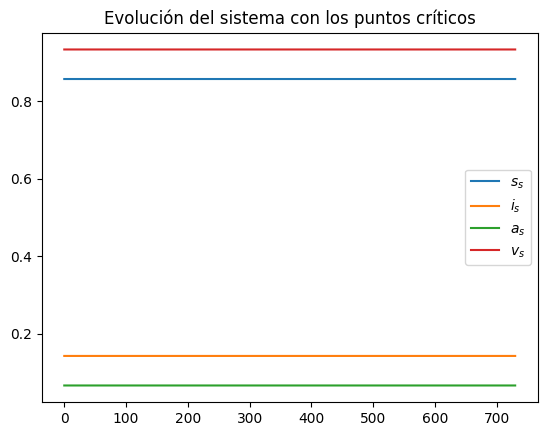

In [82]:
plt.title("Evolución del sistema con los puntos críticos")
plt.plot(ts, s_s, label="$s_s$")
plt.plot(ts, i_s, label="$i_s$")
plt.plot(ts, a_s, label="$a_s$")
plt.plot(ts, v_s, label='$v_s$')
plt.legend()
plt.show()

## 3.
Obtenga la evolución del sistema a partir de diferentes condiciones iniciales. Proponga el conjunto de condiciones iniciales que, a su criterio, mejor expliquen la reaparición año a año de brotes epidémicos de la enfermedad en determinadas zonas del  África Subsahariana.

In [83]:
import pandas as pd

df = pd.read_csv("incidence-of-malaria.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2421 entries, 0 to 2420
Data columns (total 4 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Entity                                               2421 non-null   object 
 1   Code                                                 2232 non-null   object 
 2   Year                                                 2421 non-null   int64  
 3   Incidence of malaria (per 1,000 population at risk)  2421 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 75.8+ KB


In [84]:
df["i"] = df["Incidence of malaria (per 1,000 population at risk)"] / 1000

In [85]:
df

,Entity,Code,Year,"Incidence of malaria (per 1,000 population at risk)",i
0,Afghanistan,AFG,2000,81.969560,0.081970
1,Afghanistan,AFG,2001,78.832070,0.078832
2,Afghanistan,AFG,2002,79.385790,0.079386
3,Afghanistan,AFG,2003,68.091560,0.068092
4,Afghanistan,AFG,2004,37.616467,0.037616
...,...,...,...,...,...
2416,Zimbabwe,ZWE,2016,68.375830,0.068376
2417,Zimbabwe,ZWE,2017,118.824394,0.118824
2418,Zimbabwe,ZWE,2018,55.826330,0.055826
2419,Zimbabwe,ZWE,2019,67.874060,0.067874


In [86]:
df["Entity"].unique()

array(['Afghanistan', 'Algeria', 'Angola', 'Argentina', 'Armenia',
       'Azerbaijan', 'Bangladesh', 'Belize', 'Benin', 'Bhutan', 'Bolivia',
       'Botswana', 'Brazil', 'Burkina Faso', 'Burundi', 'Cambodia',
       'Cameroon', 'Cape Verde', 'Central African Republic', 'Chad',
       'China', 'Colombia', 'Comoros', 'Congo', 'Costa Rica',
       "Cote d'Ivoire", 'Democratic Republic of Congo', 'Djibouti',
       'Dominican Republic', 'East Asia and Pacific (WB)', 'East Timor',
       'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea',
       'Eswatini', 'Ethiopia', 'Gabon', 'Gambia', 'Georgia', 'Ghana',
       'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti',
       'Honduras', 'India', 'Indonesia', 'Iran', 'Iraq', 'Kazakhstan',
       'Kenya', 'Kyrgyzstan', 'Laos', 'Latin America and Caribbean (WB)',
       'Liberia', 'Low-income countries', 'Lower-middle-income countries',
       'Madagascar', 'Malawi', 'Malaysia', 'Mali', 'Mauritania', 'Mexico',
       'Middl

In [87]:
subsharian_area = [
    'Angola',
    'Benin',
    'Botswana',
    'Cameroon',
    'Cape Verde',
    'Central African Republic',
    'Chad',
    'Congo',
    'Cote d\'Ivoire',
    'Democratic Republic of Congo',
    'Equatorial Guinea',
    'Eritrea',
    'Ethiopia',
    'Gabon',
    'Gambia',
    'Ghana',
    'Guinea',
    'Guinea-Bissau',
    'Kenya',
    'Liberia',
    'Malawi',
    'Mali',
    'Mauritania',
    'Mozambique'
]

df_subs = df[df['Entity'].isin(subsharian_area)]
df_subs.describe()

,Year,"Incidence of malaria (per 1,000 population at risk)",i
count,504.000000,504.000000,504.000000
mean,2010.000000,254.085803,0.254086
std,6.061317,150.364048,0.150364
min,2000.000000,0.000000,0.000000
25%,2005.000000,126.748672,0.126749
50%,2010.000000,275.011435,0.275011
75%,2015.000000,379.102487,0.379102
max,2020.000000,523.078100,0.523078


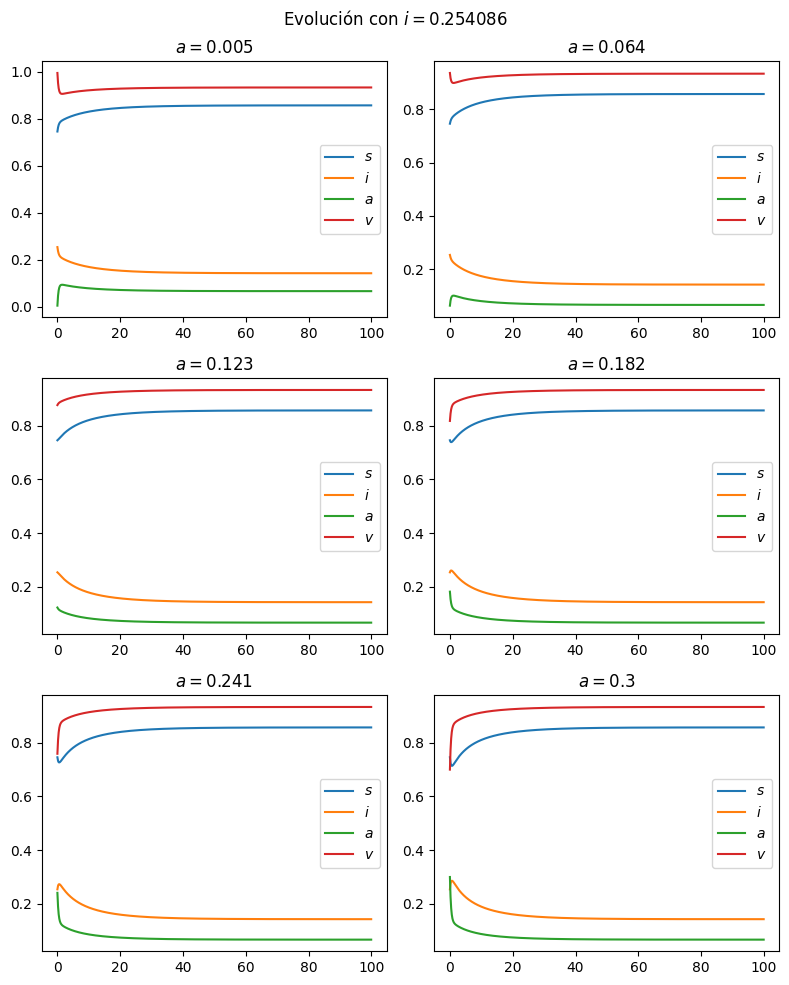

In [88]:
i = 0.254086
ts = np.arange(0, 100, 0.1 )
num_as = 6
ci_a = np.linspace(0.005, 0.3, num_as)

count = 1
plt.figure(figsize=(8, 10))
plt.suptitle(f"Evolución con $i={i}$")
for a in ci_a:
    i_s = [i]
    a_s = [a]

    s_s, i_s, v_s, a_s = euler(ts, i_s, a_s)

    plt.subplot(int(f"{int(num_as/2)}2{count}"))
    plt.title(f"$a={a}$")
    plt.plot(ts, s_s, label="$s$")
    plt.plot(ts, i_s, label="$i$")
    plt.plot(ts, a_s, label="$a$")
    plt.plot(ts, v_s, label='$v$')
    plt.legend()
    count += 1

plt.tight_layout()
plt.show()

## 4.
Genere el modelo físico diagramático que, en términos generales, le permita incluir la siguiente consideración: “Cuando un individuo ha sido infectado una vez con malaria, tiende a adquirir cierta inmunidad frente a la infecci ́on de futuras inoculaciones de la misma cepa de pl ́asmido, haciendo que sean menos probables y/o menos severas las futuras infecciones”

![Modelo físico diagramático que incluye inmunidad](img/pto4.png)

## 5.
A partir del final de la estación hmeda comienza la mortandad masiva de los mosquitos:
- Existe cierto período inicial en el cual el plásmido se encuentra en un estado inmaduro y por lo tanto en ese lapso por m ́as que el mosquito se encuentre infectado con el plásmido, si pica a un humano, es muy poco probable que lo infecte.
    - ***Latencia para mosquitos***
- En las personas picadas por mosquitos infectados se verifica un período de latencia antes de que se manifiesten síntomas de infección
    - ***Latencia para personas***
- A partir del final de la estación húmeda comienza la mortandad masiva de los mosquitos.
    - ***$\mu _v$***

## Modelo matemático
### Humanos
$\frac{ds}{dt}=\gamma _h i - \beta _h a s$

$\frac{de}{dt}=\beta _h a s - \sigma _h e$

$\frac{di}{dt}=\sigma _h e - \gamma _h i$

### Mosquitos
$\frac{dv}{dt}=\gamma _m a  - \beta _m i  v - \mu _m v$

$\frac{dl}{dt}=\beta _h i v - \sigma _m l - \mu _m l$

$\frac{da}{dt}=\sigma _m l - \gamma _m a - \mu _m a$

In [89]:
# Defino derivadas de Humanos
def ds_dt_seis(i, s, a, e):
	return gamma_h * i - beta_h * a * s

def de_dt_seis(i, s, a, e):
	return beta_h * a * s - sigma_h * e

def di_dt_seis(i, s, a, e):
	return  sigma_h * e - gamma_h * i

# Defino derivadas de Mosquitos
def dv_dt_seis(v, a, i, l, mu_m):
	return gamma_m * a - beta_m * i * v - mu_m * v

def dl_dt_seis(v, a, i, l, mu_m):
	return beta_m * i * v - sigma_m * l - mu_m * l

def da_dt_seis(v, a, i, l, mu_m):
	return  sigma_m * l - gamma_m * a - mu_m * a

def mu(t):
    amplitud = 0.2
    periodo = 365
    mu = amplitud * np.sin(2 * np.pi * t / periodo)
    return np.maximum(mu, 0.01)

def euler_sis(ts, i_s, a_s):
	dt = ts[1] - ts[0]
	
	e_s = [0]
	l_s = [0]
	v_s = [1-a_s[0]-l_s[0]]
	s_s = [1-i_s[0]-e_s[0]]
	for i in range(len(ts[1:])):
		i = i_s[-1]
		a = a_s[-1]
		l = l_s[-1]
		e = e_s[-1]
		v = v_s[-1]
		s = s_s[-1]
		
		a_s.append(a + dt * da_dt_seis(v, a, i, l, mu(i)))
		i_s.append(i + dt * di_dt_seis(i, s, a, e))
		l_s.append(l + dt * dl_dt_seis(v, a, i, e, mu(i)))
		e_s.append(e + dt * de_dt_seis(i, s, a, e))
		v_s.append(v + dt * dv_dt_seis(v, a, i, l, mu(i)))
		s_s.append(s + dt * ds_dt_seis(i, s, a, l))

	return s_s, i_s, v_s, a_s, l_s, e_s

In [90]:
# Tiempo de latencia mosquito propuesto: 2 dias
sigma_m = 1 / 2

# Tiempo de latencia humano propuesto: 5 dias
sigma_h = 1 / 5

ts = np.arange(0, 2* 365 * 0.01, 0.01)

gamma_h = 1
gamma_m = 2

beta_h = 1.2 # tasa de contagio para humanos
beta_m = 2.7 # tasa de contagio para mosquitos

i = 0.14
a = 0.09


i_s = [i]
a_s = [a]

s_s, i_s, v_s, a_s, l_s, e_s = euler_sis(ts, i_s, a_s)

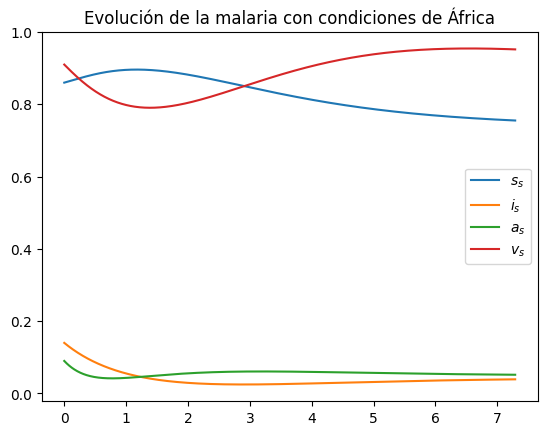

In [91]:
plt.title("Evolución de la malaria con condiciones de África")
plt.plot(ts, s_s, label="$s_s$")
plt.plot(ts, i_s, label="$i_s$")
plt.plot(ts, a_s, label="$a_s$")
plt.plot(ts, v_s, label='$v_s$')
plt.legend()
plt.show()